<a href="https://colab.research.google.com/github/Tower5954/TensorFlow/blob/main/03_Introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognising the car in-front 

## Get the data.

In [8]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-11-10 19:36:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 173.194.76.128, 142.251.5.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  47.6MB/s    in 2.2s    

2021-11-10 19:36:22 (47.6 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



🔑**Note:**🔑 We start with smaller datasets so we can experiment quickly and figure what works (or better yet, what does not work) before scaling up. 

## Inspect the data (become one with it).

A very crucial step at the beginning of any machine learning project is becoming one with the data.

For a computer vision project...this usually involves visualising many samples of the data. 

In [9]:
!ls pizza_steak

test  train


In [10]:
!ls pizza_steak/train

pizza  steak


In [11]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [12]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [13]:
# The extra file in the pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Nov 10 19:36 .
drwxr-xr-x 1 root root 4096 Nov 10 19:36 ..
-rw-r--r-- 1 root root 6148 Nov 10 19:36 .DS_Store
drwxr-xr-x 4 root root 4096 Nov 10 19:36 test
drwxr-xr-x 4 root root 4096 Nov 10 19:36 train


In [14]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise the images, first let us get the class names programmatically.

In [15]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Craeted a list of classnames from the subdirectories

print(class_names)

['.DS_Store' 'pizza' 'steak']


In [16]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Craeted a list of classnames from the subdirectories
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']




Visualise our images.

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random


def view_random_image(target_dir, target_class):
  # Set up the target directory (we will view the images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) 
  print(random_image)

  # Read in the image using matplotlib
  img = mping.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");


  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

View a random image from the training set

['3777020.jpg']
Image shape: (512, 512, 3)


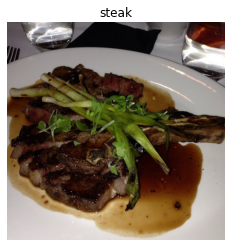

In [18]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

['2155735.jpg']
Image shape: (512, 512, 3)


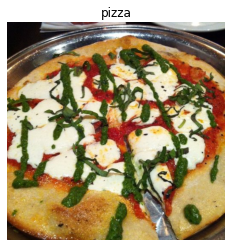

In [19]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [20]:
img.dtype

dtype('uint8')

In [21]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  8,   6,  11],
        [  9,   7,  12],
        [ 10,   8,  13],
        ...,
        [178, 189, 175],
        [181, 191, 180],
        [182, 192, 181]],

       [[ 10,   8,  13],
        [  9,   7,  12],
        [  9,   7,  12],
        ...,
        [181, 191, 180],
        [182, 192, 181],
        [182, 192, 181]],

       [[ 11,   9,  14],
        [ 10,   8,  13],
        [  8,   6,  11],
        ...,
        [184, 194, 185],
        [183, 193, 184],
        [182, 192, 183]],

       ...,

       [[ 68,  38,  27],
        [ 63,  34,  20],
        [ 59,  30,  16],
        ...,
        [ 90,  74,  59],
        [ 93,  77,  64],
        [ 91,  75,  62]],

       [[ 79,  49,  39],
        [ 70,  40,  29],
        [ 62,  32,  21],
        ...,
        [ 84,  68,  55],
        [ 94,  77,  67],
        [ 97,  80,  70]],

       [[ 99,  69,  59],
        [ 87,  57,  47],
        [ 74,  44,  33],
        ...,
        [ 89,  73,  6

In [22]:
# View the image shape

img.shape # returns width, height, colour channels

(512, 512, 3)

🔑 **Note:** 🔑 Many machine learning models, including neural networks prefer the values they work with to be 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalisation**) the pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [23]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.03137255, 0.02352941, 0.04313725],
        [0.03529412, 0.02745098, 0.04705882],
        [0.03921569, 0.03137255, 0.05098039],
        ...,
        [0.69803922, 0.74117647, 0.68627451],
        [0.70980392, 0.74901961, 0.70588235],
        [0.71372549, 0.75294118, 0.70980392]],

       [[0.03921569, 0.03137255, 0.05098039],
        [0.03529412, 0.02745098, 0.04705882],
        [0.03529412, 0.02745098, 0.04705882],
        ...,
        [0.70980392, 0.74901961, 0.70588235],
        [0.71372549, 0.75294118, 0.70980392],
        [0.71372549, 0.75294118, 0.70980392]],

       [[0.04313725, 0.03529412, 0.05490196],
        [0.03921569, 0.03137255, 0.05098039],
        [0.03137255, 0.02352941, 0.04313725],
        ...,
        [0.72156863, 0.76078431, 0.7254902 ],
        [0.71764706, 0.75686275, 0.72156863],
        [0.71372549, 0.75294118, 0.71764706]],

       ...,

       [[0.26666667, 0.14901961, 0.10588235],
        [0.24705882, 0.13333333, 0.07843137],
        [0.23137255, 0

## An end-to-end example.


We will build a convolutional neural network to find patterns in our images, more specifically we need a way to: 
* Load the images
* Preprocess the images 
* Build a CNN to find patterns in our images
* Compile the CNN 
* Fit the CNN to the training data 

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
# Set the seed 
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 and 1, also called scaling/normalisation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up paths to the directories 
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(244, 244),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(244, 244),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (This is the same model as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(244, 244, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN 
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 271ms/step - loss: 0.5672 - accuracy: 0.6960 - val_loss: 0.3879 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4149 - accuracy: 0.8087 - val_loss: 0.3422 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3820 - accuracy: 0.8313 - val_loss: 0.3087 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 11s 245ms/step - loss: 0.3627 - accuracy: 0.8520 - val_loss: 0.2990 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 12s 252ms/step - loss: 0.3182 - accuracy: 0.8687 - val_loss: 0.3164 - val_accuracy: 0.8640


🔑 **Note:** 🔑 If the above cell is taking longer than ~1 minute per epoch, make sure that you are using a GPU by going to Runtime -> Change Runtime type -> Hardware Accelarator -> GPU.
(You may have to rerun the cells above). 

In [27]:
# Without a GPU
# 47/47 [==============================] - 126s 3s/step - loss: 0.5639 - accuracy: 0.7193 - val_loss: 0.4292 - val_accuracy: 0.8400

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                    